In [3]:
pip install pandas numpy scikit-learn seaborn matplotlib xgboost streamlit joblib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\real_estate_investment_predictor\data\real_estate_investment_dataset.csv")

# View first 5 rows
df.head()

,Price_Growth_5Y(%),Crime_Rate(per_1000),Rental_Yield(%),Population_Growth(%),Unemployment_Rate(%),Schools_Nearby,Hospitals_Nearby,Infrastructure_Projects,Natural_Disaster_Risk(0-10),Market_Demand_Index,Safe_Investment
0,4.363503,3.532404,3.689351,0.247318,11.857422,15,4,0,4.403234,38.420671,0
1,18.767858,27.036377,4.785903,-0.840807,2.319630,1,6,1,6.152980,3.899601,0
2,13.299849,27.491121,3.770105,0.088613,2.287606,5,3,0,0.834641,3.095579,0
3,9.966462,32.234065,2.887025,2.498249,6.206933,11,3,1,8.824164,38.798676,0
4,-1.099534,36.578475,3.206359,1.528547,8.352361,4,3,1,8.036035,16.002494,0


In [9]:
# Check shape and data types
print(df.shape)
print(df.info())

(300, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price_Growth_5Y(%)           300 non-null    float64
 1   Crime_Rate(per_1000)         300 non-null    float64
 2   Rental_Yield(%)              300 non-null    float64
 3   Population_Growth(%)         300 non-null    float64
 4   Unemployment_Rate(%)         300 non-null    float64
 5   Schools_Nearby               300 non-null    int64  
 6   Hospitals_Nearby             300 non-null    int64  
 7   Infrastructure_Projects      300 non-null    int64  
 8   Natural_Disaster_Risk(0-10)  300 non-null    float64
 9   Market_Demand_Index          300 non-null    float64
 10  Safe_Investment              300 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.9 KB
None


In [11]:
# Check missing values
df.isnull().sum()

Price_Growth_5Y(%)             0
Crime_Rate(per_1000)           0
Rental_Yield(%)                0
Population_Growth(%)           0
Unemployment_Rate(%)           0
Schools_Nearby                 0
Hospitals_Nearby               0
Infrastructure_Projects        0
Natural_Disaster_Risk(0-10)    0
Market_Demand_Index            0
Safe_Investment                0
dtype: int64

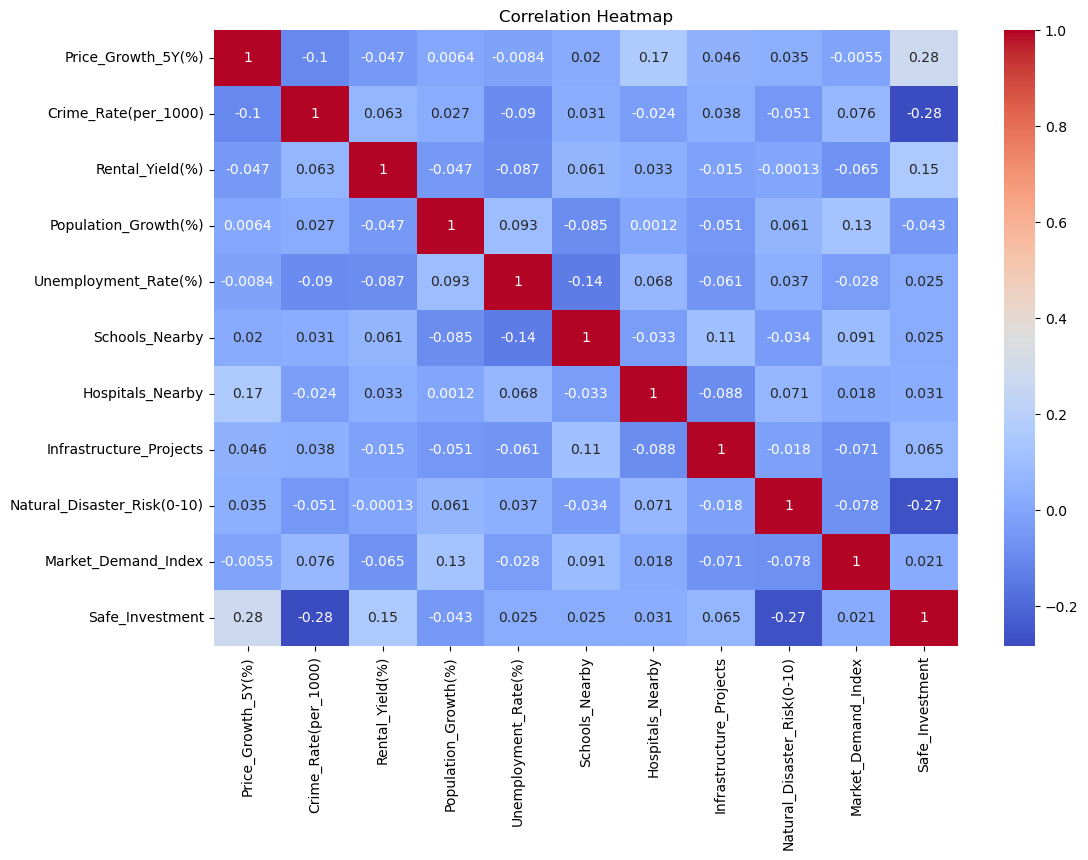

In [19]:
#Step 3: Exploratory Data Analysis (EDA)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

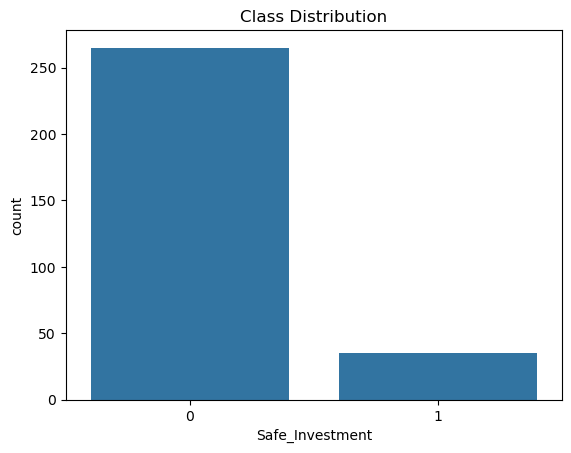

In [21]:
# Distribution of target variable
sns.countplot(x='Safe_Investment', data=df)
plt.title('Class Distribution')
plt.show()

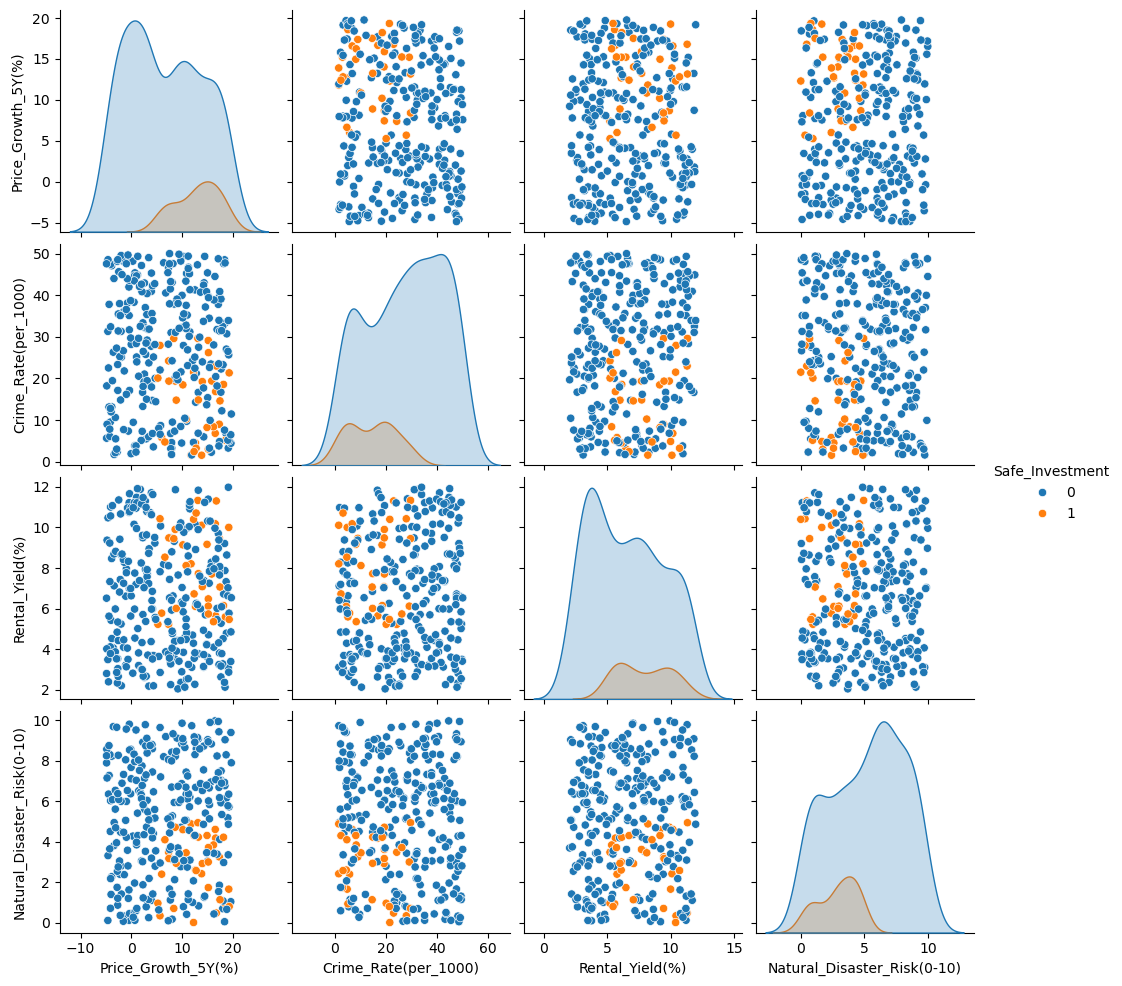

In [23]:
sns.pairplot(df[['Price_Growth_5Y(%)', 'Crime_Rate(per_1000)', 'Rental_Yield(%)', 
                 'Natural_Disaster_Risk(0-10)', 'Safe_Investment']], hue='Safe_Investment')
plt.show()

In [25]:
#Step 4: Data Preprocessing & Train-Test Split
#Separate features (X) and target (y)
# Features (X) and Target (y)
X = df.drop("Safe_Investment", axis=1)
y = df["Safe_Investment"]

In [29]:
#Scale the featuresfrom sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [31]:
#Split into Train and Test Sets
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), "\n")
print(y_test.value_counts())

(240, 10) (60, 10)
Safe_Investment
0    212
1     28
Name: count, dtype: int64 

Safe_Investment
0    53
1     7
Name: count, dtype: int64


In [37]:
#Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [39]:
#Initialize the models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [43]:
#Train the models
# Logistic Regression
log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Decision Tree
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Logistic Regression predictions
y_pred_log = log_model.predict(X_test)

In [51]:
# Decision Tree predictions
y_pred_tree = tree_model.predict(X_test)

In [53]:
# Random Forest predictions
y_pred_rf = rf_model.predict(X_test)

In [55]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"📊 Results for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Evaluate each
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

📊 Results for Logistic Regression
Accuracy: 0.8833333333333333
Precision: 0.5
Recall: 0.42857142857142855
F1-Score: 0.46153846153846156

Confusion Matrix:
 [[50  3]
 [ 4  3]]
--------------------------------------------------
📊 Results for Decision Tree
Accuracy: 0.9666666666666667
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-Score: 0.8571428571428571

Confusion Matrix:
 [[52  1]
 [ 1  6]]
--------------------------------------------------
📊 Results for Random Forest
Accuracy: 0.9666666666666667
Precision: 1.0
Recall: 0.7142857142857143
F1-Score: 0.8333333333333334

Confusion Matrix:
 [[53  0]
 [ 2  5]]
--------------------------------------------------


In [57]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf)
    ]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.883333   0.500000  0.428571  0.461538
1        Decision Tree  0.966667   0.857143  0.857143  0.857143
2        Random Forest  0.966667   1.000000  0.714286  0.833333


In [59]:
#Bar Plot to Compare Model Performance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
# Model names
models = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Metrics
accuracy = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]

precision = [
    precision_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_tree),
    precision_score(y_test, y_pred_rf)
]

recall = [
    recall_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_rf)
]

f1 = [
    f1_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_tree),
    f1_score(y_test, y_pred_rf)
]

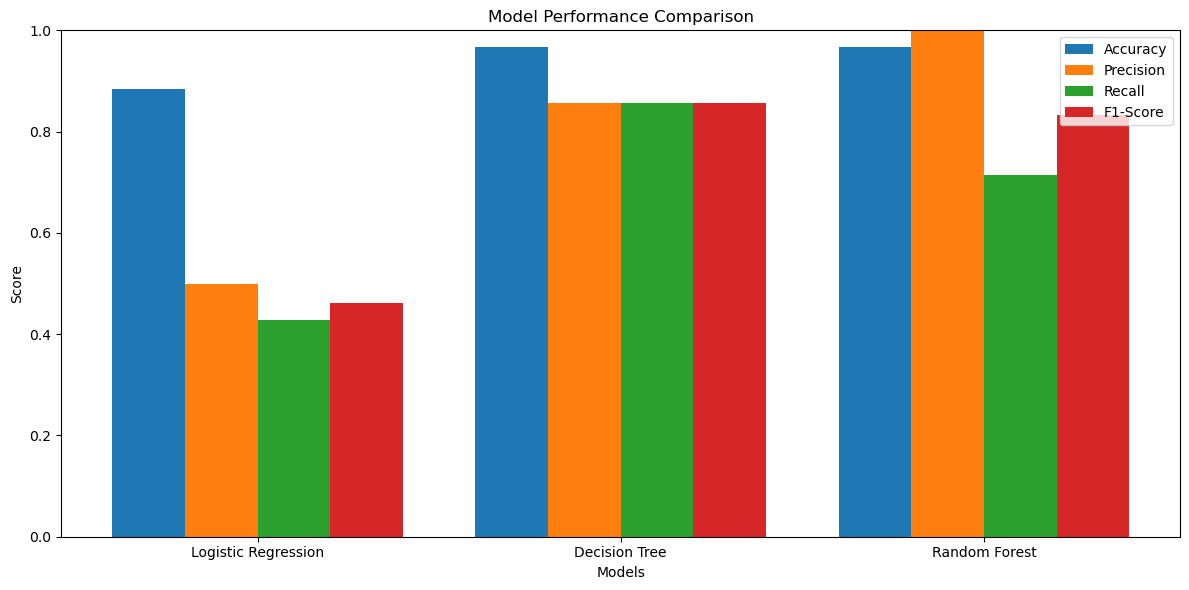

In [63]:
# Set figure size
plt.figure(figsize=(12, 6))

# X-axis positions
x = np.arange(len(models))
width = 0.2  # Bar width

# Plot each metric
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1-Score')

# Labels and title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [65]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [69]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'real_estate_investment_model.pkl')

['real_estate_investment_model.pkl']

In [71]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
